In [380]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay, roc_curve, confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from datetime import timedelta
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV #GridSearch is for hyperparameter tuning
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [381]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/Fraud_Detection_Dataset.csv')
df.shape

(10000, 10)

In [382]:
df

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No
...,...,...,...,...,...,...,...,...,...,...
9995,9996,1524,1475.988992,2023-01-07 22:35:00,Clothing,Los Angeles,95.068658,414.231539,desktop,Yes
9996,9997,4879,764.834233,2023-01-07 22:36:00,Clothing,Los Angeles,902.506946,1090.687430,mobile,No
9997,9998,2624,882.096776,2023-01-07 22:37:00,Travel,New York,531.237353,186.667431,mobile,No
9998,9999,4907,1.000000,2023-01-07 22:38:00,Dining,Chicago,0.000000,116.343224,desktop,No


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  int64  
 1   Customer ID                  10000 non-null  int64  
 2   Transaction Amount           10000 non-null  float64
 3   Transaction Date and Time    10000 non-null  object 
 4   Merchant Category            10000 non-null  object 
 5   Location                     10000 non-null  object 
 6   Previous Transaction Amount  10000 non-null  float64
 7   Time Since Last Transaction  10000 non-null  float64
 8   Device Type                  10000 non-null  object 
 9   Fraud                        10000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 781.4+ KB


In [384]:
df.describe()

,Transaction ID,Customer ID,Transaction Amount,Previous Transaction Amount,Time Since Last Transaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,3010.561100,559.865608,461.410984,677.040726
std,2886.89568,1152.371939,399.984400,334.582413,432.386769
min,1.00000,1000.000000,1.000000,0.000000,1.000000
25%,2500.75000,2001.750000,262.969956,181.109688,295.523894
50%,5000.50000,3004.000000,522.370941,404.367010,653.143168
75%,7500.25000,4010.000000,788.415931,676.079655,1048.479972
max,10000.00000,4999.000000,2953.394492,1500.000000,1694.715674


In [385]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No


In [386]:
# Checking and dropping Null Values
df.isnull().sum()

Transaction ID                 0
Customer ID                    0
Transaction Amount             0
Transaction Date and Time      0
Merchant Category              0
Location                       0
Previous Transaction Amount    0
Time Since Last Transaction    0
Device Type                    0
Fraud                          0
dtype: int64

In [387]:
# This dataset spans over a week of credit card transactions, all date and times are unique

df['Transaction Date and Time'].max() 

'2023-01-07 22:39:00'

In [388]:
df['Fraud'].value_counts()

Fraud
No     8608
Yes    1392
Name: count, dtype: int64

In [389]:
#Converting Fraud to Binary

df['Fraud'] = df['Fraud'].replace({'No': 0, 'Yes': 1})

/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_29578/3829008592.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Fraud'] = df['Fraud'].replace({'No': 0, 'Yes': 1})


In [390]:
# 13.92% of the dataset is a fraud transaction
fraud_df = df[df['Fraud'] == 1]
fraud_df

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
13,14,2482,856.362115,2023-01-01 00:13:00,Groceries,Houston,36.515172,170.657109,mobile,1
39,40,1474,1052.211001,2023-01-01 00:39:00,Electronics,Los Angeles,183.630874,535.274618,mobile,1
47,48,2806,338.605096,2023-01-01 00:47:00,Clothing,Chicago,292.361587,1218.527369,desktop,1
48,49,1189,1211.134671,2023-01-01 00:48:00,Groceries,San Francisco,336.289129,84.284262,desktop,1
51,52,4005,355.772351,2023-01-01 00:51:00,Groceries,Houston,147.844470,81.471113,desktop,1
...,...,...,...,...,...,...,...,...,...,...
9974,9975,2781,1027.524442,2023-01-07 22:14:00,Dining,Houston,128.246488,48.849829,mobile,1
9982,9983,4755,1219.936323,2023-01-07 22:22:00,Clothing,New York,137.483649,573.554873,desktop,1
9989,9990,1193,842.245668,2023-01-07 22:29:00,Electronics,San Francisco,786.116628,467.160528,desktop,1
9993,9994,2184,1084.260284,2023-01-07 22:33:00,Groceries,Houston,241.185853,122.790026,desktop,1


In [391]:
cx = df.groupby('Customer ID')
cx.head()

#Some Customers have multiple fraud transactions on the dataset

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,0
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,0
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,0
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,0
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,1524,1475.988992,2023-01-07 22:35:00,Clothing,Los Angeles,95.068658,414.231539,desktop,1
9996,9997,4879,764.834233,2023-01-07 22:36:00,Clothing,Los Angeles,902.506946,1090.687430,mobile,0
9997,9998,2624,882.096776,2023-01-07 22:37:00,Travel,New York,531.237353,186.667431,mobile,0
9998,9999,4907,1.000000,2023-01-07 22:38:00,Dining,Chicago,0.000000,116.343224,desktop,0


## EDA Portion

In [392]:
df

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,0
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,0
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,0
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,0
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,1524,1475.988992,2023-01-07 22:35:00,Clothing,Los Angeles,95.068658,414.231539,desktop,1
9996,9997,4879,764.834233,2023-01-07 22:36:00,Clothing,Los Angeles,902.506946,1090.687430,mobile,0
9997,9998,2624,882.096776,2023-01-07 22:37:00,Travel,New York,531.237353,186.667431,mobile,0
9998,9999,4907,1.000000,2023-01-07 22:38:00,Dining,Chicago,0.000000,116.343224,desktop,0


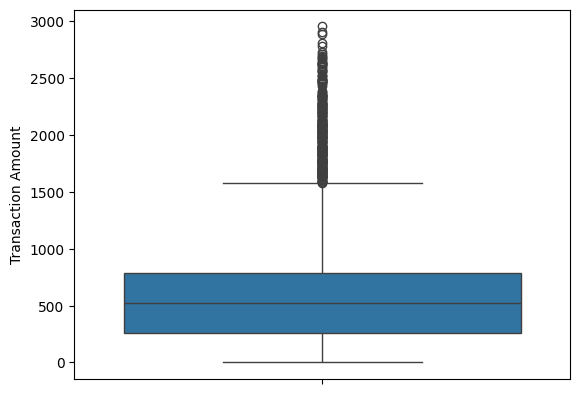

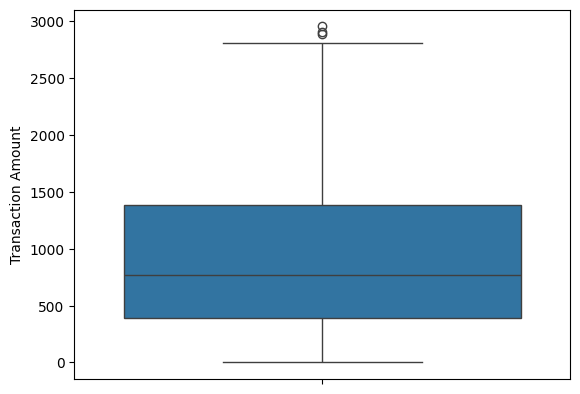

In [393]:
#Univariate Analysis of transaction data

sns.boxplot(y=df['Transaction Amount'])
plt.show()

# Lots of outliers throughout the dataset

sns.boxplot(y=fraud_df['Transaction Amount'])
plt.show()

# More fraud transactions seem to have a higher transaction amount compared to the whole dataset 

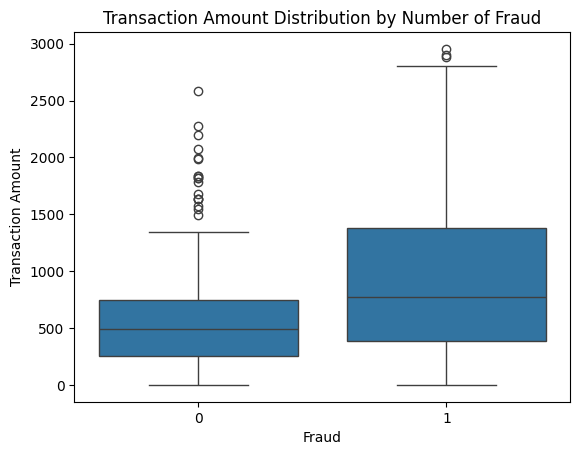

In [394]:
# It seems there is a larger distribution and average of frauded transactions have a higher transaction amount

sns.boxplot(x='Fraud', y='Transaction Amount', data=df)
plt.xlabel('Fraud')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount Distribution by Number of Fraud')
plt.show()

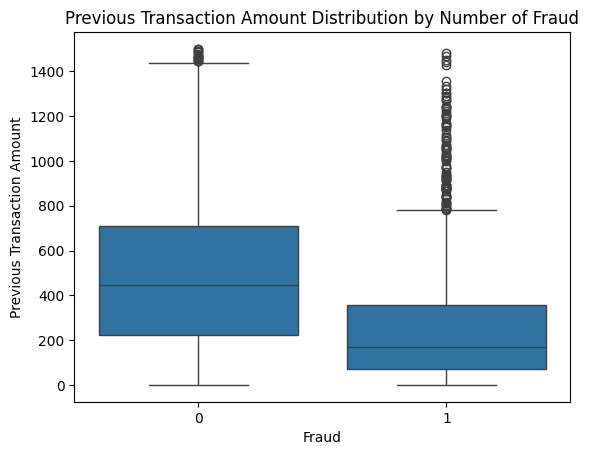

In [395]:
#Looks like customers who purchased before a fraudulent transaction had a lower transaction amount

sns.boxplot(x='Fraud', y='Previous Transaction Amount', data=df)
plt.xlabel('Fraud')
plt.ylabel('Previous Transaction Amount')
plt.title('Previous Transaction Amount Distribution by Number of Fraud')
plt.show()

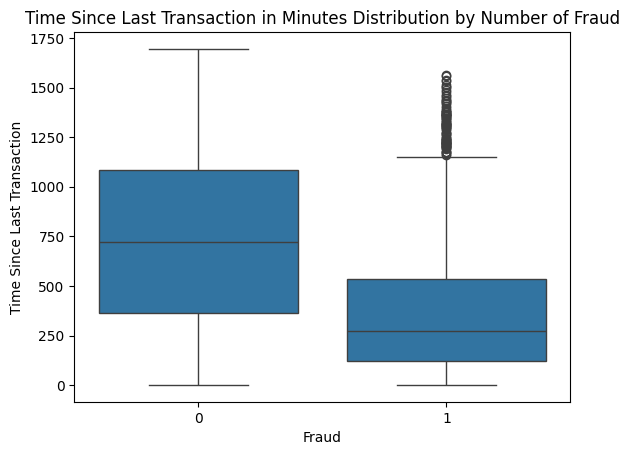

In [396]:
# It looks like for customers with a fraud transaction wasted little time to commit fraud shortly after the previous transaction
# This is longer compared to customers with no fraud transactions who take longer between purchases on average

sns.boxplot(x='Fraud', y='Time Since Last Transaction', data=df)
plt.xlabel('Fraud')
plt.ylabel('Time Since Last Transaction')
plt.title('Time Since Last Transaction in Minutes Distribution by Number of Fraud')
plt.show()

<Axes: xlabel='Fraud', ylabel='Customer ID'>

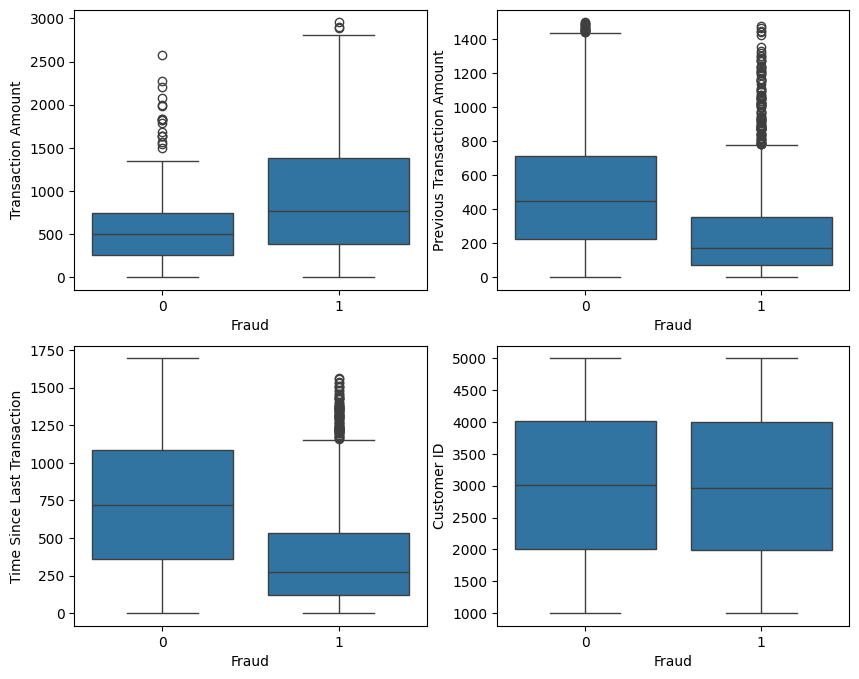

In [397]:
# Combined into a grid of box plots to observe potential pattern between transaction amounts and time

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,8))
sns.boxplot(x='Fraud', y='Transaction Amount', data=df, ax=ax1)
sns.boxplot(x='Fraud', y='Previous Transaction Amount', data=df, ax=ax2)
sns.boxplot(x='Fraud', y='Time Since Last Transaction', data=df, ax=ax3)
sns.boxplot(x='Fraud', y='Customer ID', data=df, ax=ax4)

<Axes: xlabel='Location', ylabel='Count'>

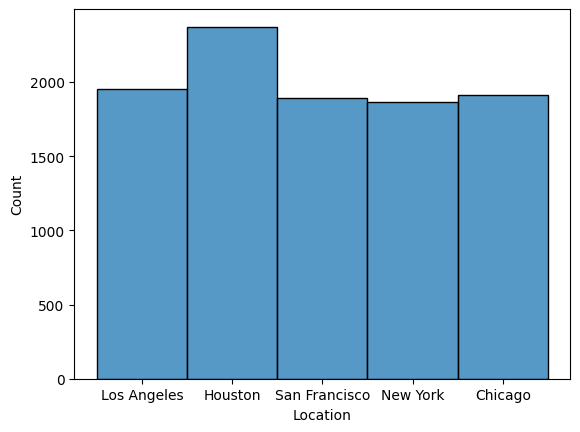

In [398]:
# Distribution of total users within each location
sns.histplot (x=df['Location'])

<Axes: xlabel='Fraud', ylabel='Count'>

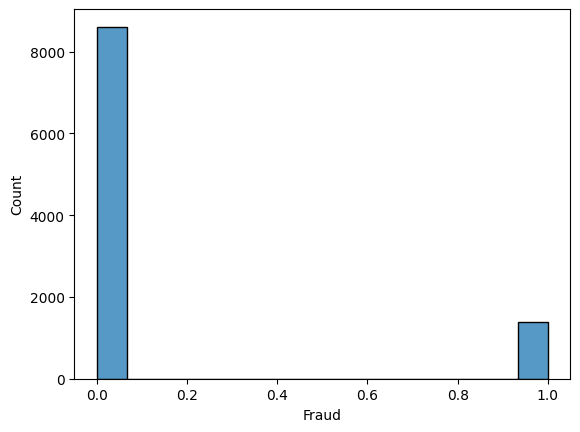

In [399]:
#Checking to see the count of users who have committed fraud
sns.histplot(x=df['Fraud'])

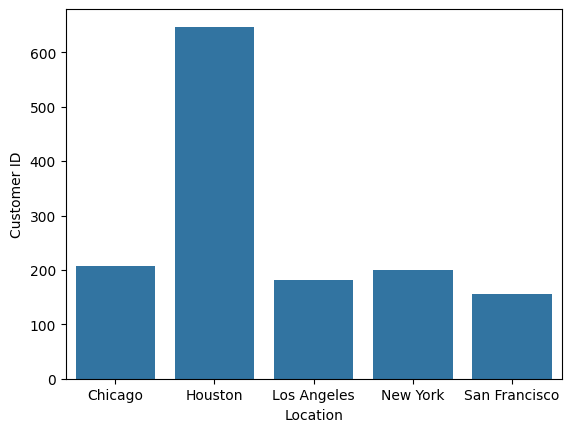

In [400]:
#Check number of frauded transactions based on location

loc = fraud_df.groupby('Location')
sns.barplot(x=loc['Customer ID'].count().index, y=loc['Customer ID'].count())
plt.show()

# It seems majority of fraud transactions occur in Houston

<Axes: xlabel='Merchant Category', ylabel='Count'>

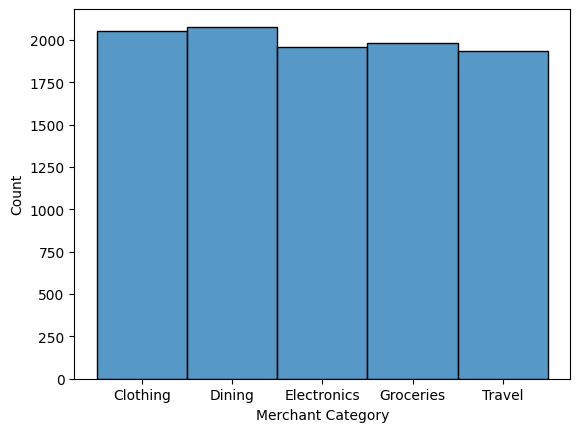

In [401]:
#Checking all transactions for merchant category

sns.histplot(df['Merchant Category'])

# Quite even amongst all customer transactions

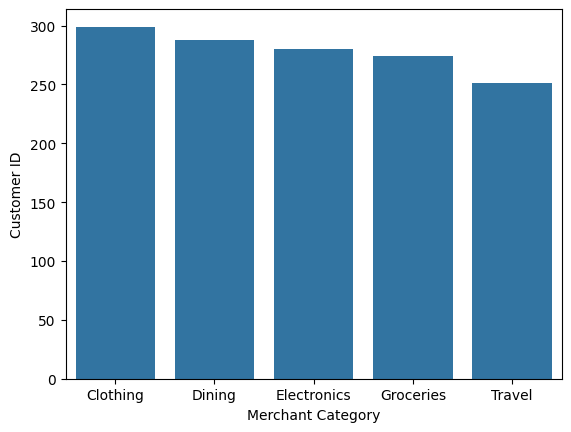

In [402]:
#Checking Merchant history distribution for fraud transactions to see any patterns

merch = fraud_df.groupby('Merchant Category')
sns.barplot(x=merch['Customer ID'].count().index, y=merch['Customer ID'].count())
plt.show()


# No significant difference amongst merchant categories for fraud transactions

<Axes: xlabel='Device Type', ylabel='Count'>

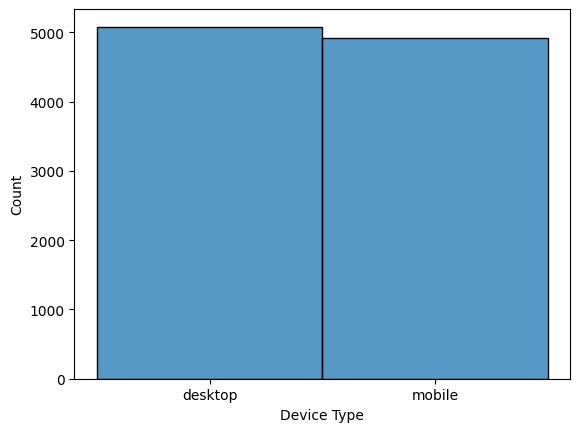

In [403]:
#Check Device type Distribution

sns.histplot(df['Device Type'])

# #Distribution is even between both device categories

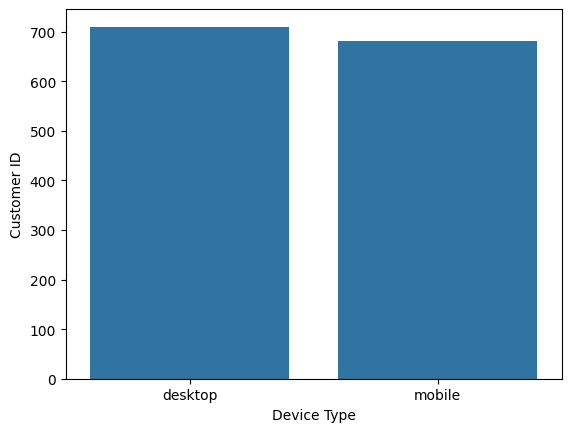

In [404]:
#Check Device Distribution for Fraud transactions

device = fraud_df.groupby('Device Type')
sns.barplot(x=device['Customer ID'].count().index, y=device['Customer ID'].count())
plt.show()

# No significant difference amongst frauded users as well

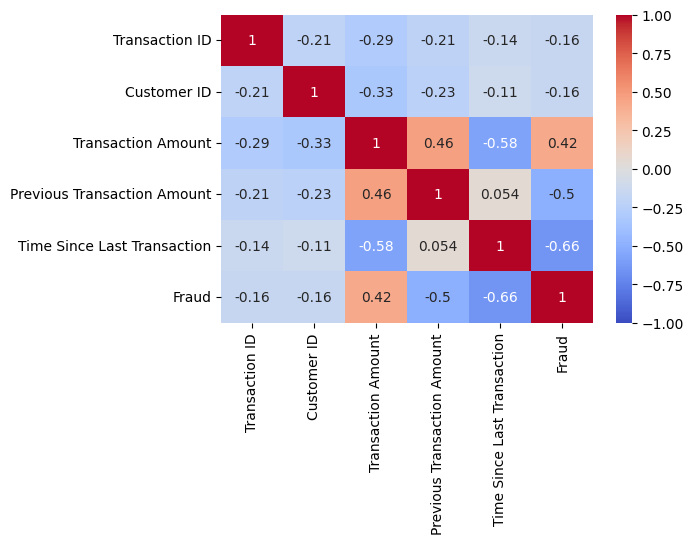

Fraud Correlation Matrix:
Transaction Amount             0.360897
Customer ID                   -0.009120
Transaction ID                -0.011482
Previous Transaction Amount   -0.236843
Time Since Last Transaction   -0.268011
Name: Fraud, dtype: float64


/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_29578/138304690.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_corr.values, y=fraud_corr.index, palette='viridis')


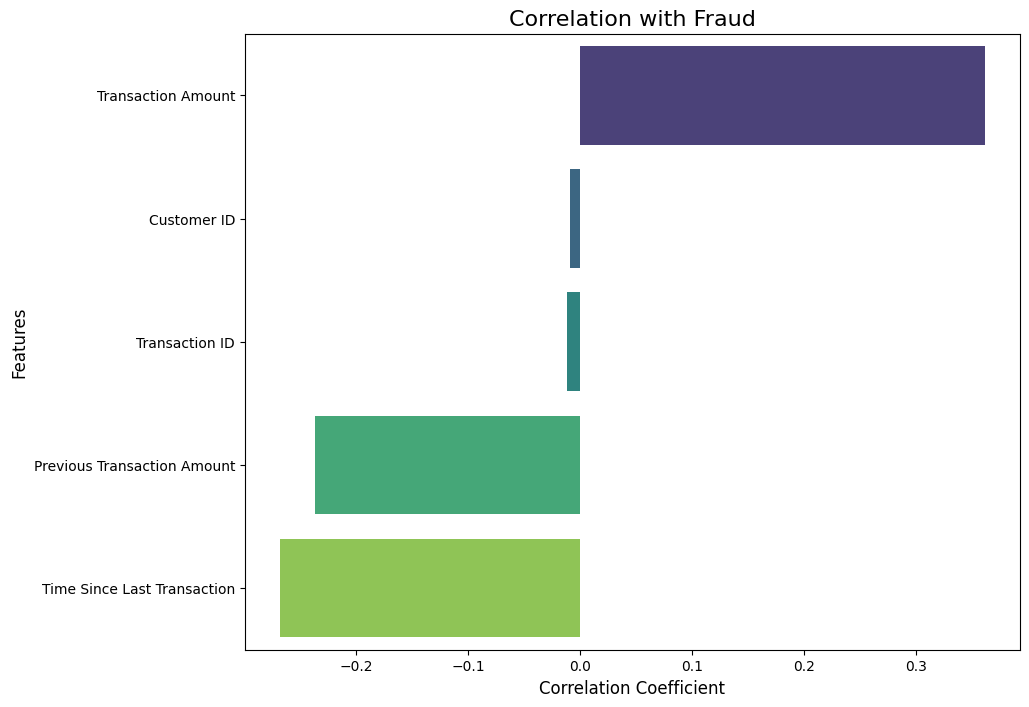

In [405]:
#HEATMAP AND CORRELATION MATRIX

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_features].corr()


plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
# Display the plot
plt.show()

# Correlation with the target variable
fraud_corr = corr_matrix['Fraud'].drop('Fraud').sort_values(ascending=False)
print("Fraud Correlation Matrix:")
print(fraud_corr)

# Bar plot for correlation with Fraud
plt.figure(figsize=(10, 8))
sns.barplot(x=fraud_corr.values, y=fraud_corr.index, palette='viridis')
plt.title('Correlation with Fraud', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()



# Observing the heatmap as well as the correlation matrix, it seems "Transaction Ammount, Previous Transaction Amount, and Time Since Last Transaction"
# are the most correlated with our fraud output value and are believed to be of high importance for our hypotehsis prediction

## Feature Engineering and Selection

In [406]:

df.describe()

,Transaction ID,Customer ID,Transaction Amount,Previous Transaction Amount,Time Since Last Transaction,Fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,3010.561100,559.865608,461.410984,677.040726,0.139200
std,2886.89568,1152.371939,399.984400,334.582413,432.386769,0.346172
min,1.00000,1000.000000,1.000000,0.000000,1.000000,0.000000
25%,2500.75000,2001.750000,262.969956,181.109688,295.523894,0.000000
50%,5000.50000,3004.000000,522.370941,404.367010,653.143168,0.000000
75%,7500.25000,4010.000000,788.415931,676.079655,1048.479972,0.000000
max,10000.00000,4999.000000,2953.394492,1500.000000,1694.715674,1.000000


In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  int64  
 1   Customer ID                  10000 non-null  int64  
 2   Transaction Amount           10000 non-null  float64
 3   Transaction Date and Time    10000 non-null  object 
 4   Merchant Category            10000 non-null  object 
 5   Location                     10000 non-null  object 
 6   Previous Transaction Amount  10000 non-null  float64
 7   Time Since Last Transaction  10000 non-null  float64
 8   Device Type                  10000 non-null  object 
 9   Fraud                        10000 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 781.4+ KB


In [408]:
#Feature Engineering
# Could create a categorical feature from "Transaction Amount" 
# Could create a time period feature for "Time since last transaction"

#Gettign float to int error

In [409]:
#Feature Transformation and Selection

## Did not include transaction date and time as values were all unique

categorical = ['Merchant Category', 'Location', 'Device Type']
numerical = ['Transaction Amount', 'Previous Transaction Amount', 'Time Since Last Transaction']
target = ['Fraud']

# train and test set
X_train, X_test, y_train, y_test = train_test_split(df[categorical + numerical], df[target], test_size=0.3, random_state=123)

#Feature Transformers - Applying OneHotEncoding and MinMaxScaler
# prevent one hot encoder from returning a sparse matrix (GuassianNB will throw an error otherwise)
catTransformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
numTransformer = Pipeline(steps = [('scaler', MinMaxScaler())])

#Build Preprocessor
preprocessor = ColumnTransformer(transformers = [('cat', catTransformer, categorical), ('num', numTransformer, numerical)])

## Model Building

In [410]:
## Logistic Regression Setup

logreg = Pipeline(steps = [('preprocessor', preprocessor), ('logistic', LogisticRegression())])

# fit model
logreg.fit(X_train, y_train)
# predictions
pred = logreg.predict(X_test)

# performance metrics (binary)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)

# cross validation
crossVal = cross_val_score(logreg, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

#Print the classification report
report_LR = classification_report(y_test, pred)
print(report_LR)

Accuracy: 0.9246666666666666
Precision: 0.9353233830845771
Recall Score: 0.4688279301745636
F1 Score: 0.6245847176079734


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning

Cross Validation F1 Scores: [0.58333333 0.7012987  0.60689655 0.61643836 0.65789474 0.61643836
 0.59722222 0.66233766 0.67105263 0.61744966]
Mean cross validation F1 Score: 0.6330362216095408
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      2599
           1       0.94      0.47      0.62       401

    accuracy                           0.92      3000
   macro avg       0.93      0.73      0.79      3000
weighted avg       0.93      0.92      0.91      3000



In [411]:
#Naive Bayes Setup

nb = Pipeline(steps = [('preprocessor', preprocessor), ('nb', GaussianNB())])
# fit
nb.fit(X_train, y_train)
# predict
pred = nb.predict(X_test)


# performance metrics (binary)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)


# cross validation
crossVal = cross_val_score(nb, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

#Print the classification report
report_NB = classification_report(y_test, pred)
print(report_NB)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning

Accuracy: 0.8953333333333333
Precision: 0.6298507462686567
Recall Score: 0.5261845386533666
F1 Score: 0.5733695652173914
Cross Validation F1 Scores: [0.49450549 0.65909091 0.61818182 0.59302326 0.60512821 0.50285714
 0.58426966 0.61797753 0.57754011 0.54347826]
Mean cross validation F1 Score: 0.5796052384410195
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2599
           1       0.63      0.53      0.57       401

    accuracy                           0.90      3000
   macro avg       0.78      0.74      0.76      3000
weighted avg       0.89      0.90      0.89      3000



/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [412]:
#KNN Setup


knn = Pipeline(steps = [('preprocessor', preprocessor), ('knn', KNeighborsClassifier())])

# fit model
knn.fit(X_train, y_train)
# predictions
pred = knn.predict(X_test)
# performance metrics (binary)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)

# cross validation
crossVal = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

#Print the classification report
report_KNN = classification_report(y_test, pred)
print(report_KNN)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWa

Accuracy: 0.922
Precision: 0.9113300492610837
Recall Score: 0.4613466334164589
F1 Score: 0.6125827814569537


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWa

Cross Validation F1 Scores: [0.55782313 0.70512821 0.63087248 0.57718121 0.61146497 0.6
 0.59602649 0.6875     0.59354839 0.58441558]
Mean cross validation F1 Score: 0.6143960455386523
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      2599
           1       0.91      0.46      0.61       401

    accuracy                           0.92      3000
   macro avg       0.92      0.73      0.78      3000
weighted avg       0.92      0.92      0.91      3000



In [413]:
#Random Forest Classifier

rf = Pipeline(steps= [('preprocessor', preprocessor), ('rf', RandomForestClassifier(n_estimators=100, random_state=100))])

rf.fit(X_train, y_train)
rf.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)

# cross validation
crossVal = cross_val_score(rf, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

#Print the classification report
report_RF = classification_report(y_test, pred)
print(report_RF)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.922
Precision: 0.9113300492610837
Recall Score: 0.4613466334164589
F1 Score: 0.6125827814569537


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A co

Cross Validation F1 Scores: [0.62025316 0.76363636 0.70807453 0.68387097 0.73255814 0.7125
 0.69620253 0.73493976 0.73291925 0.69512195]
Mean cross validation F1 Score: 0.7080076666191247
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      2599
           1       0.91      0.46      0.61       401

    accuracy                           0.92      3000
   macro avg       0.92      0.73      0.78      3000
weighted avg       0.92      0.92      0.91      3000



In [414]:
## After evaluation of all the models, Logistic Regression seems as it has the best fit to predict our output given all the features included 
## Highest F1-Score of 62%

# -- LOGISTIC REGRESSION -- 


# Define the hyperparameter grid
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2', 'elasticnet'],
    'logistic__solver': ['saga'],  # saga solver supports l1, l2, and elasticnet
    'logistic__class_weight': [None, 'balanced', {0: 1, 1: 10}]
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(logreg, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)


# Output the best hyperparameter combination
print("Best hyperparameters for Logistic Regression:", grid_search.best_params_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning

Best hyperparameters for Logistic Regression: {'logistic__C': 100, 'logistic__class_weight': None, 'logistic__penalty': 'l1', 'logistic__solver': 'saga'}


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/steven.souksavath/Library/Python/3.9/l

In [415]:
#Build final pipeline with best params

logreg = Pipeline(steps= [('preprocessor', preprocessor), ('logistic', LogisticRegression(C=100, penalty='l1', solver='saga'))])

logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)

# performance metrics (binary)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred)
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)


# cross validation
crossVal = cross_val_score(logreg, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

report_logreg_grid = classification_report(y_test, pred)
print(report_logreg_grid)


# After performing grid search for the best hyper parameters, our final logistic regression model F1-Score increased by 65%


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.928
Precision: 0.9383886255924171
Recall Score: 0.4937655860349127
F1 Score: 0.6470588235294118


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/s

Cross Validation F1 Scores: [0.6122449  0.72611465 0.62585034 0.6442953  0.65789474 0.64
 0.62162162 0.69620253 0.69230769 0.63576159]
Mean cross validation F1 Score: 0.6552293361611152
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2599
           1       0.94      0.49      0.65       401

    accuracy                           0.93      3000
   macro avg       0.93      0.74      0.80      3000
weighted avg       0.93      0.93      0.92      3000



/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


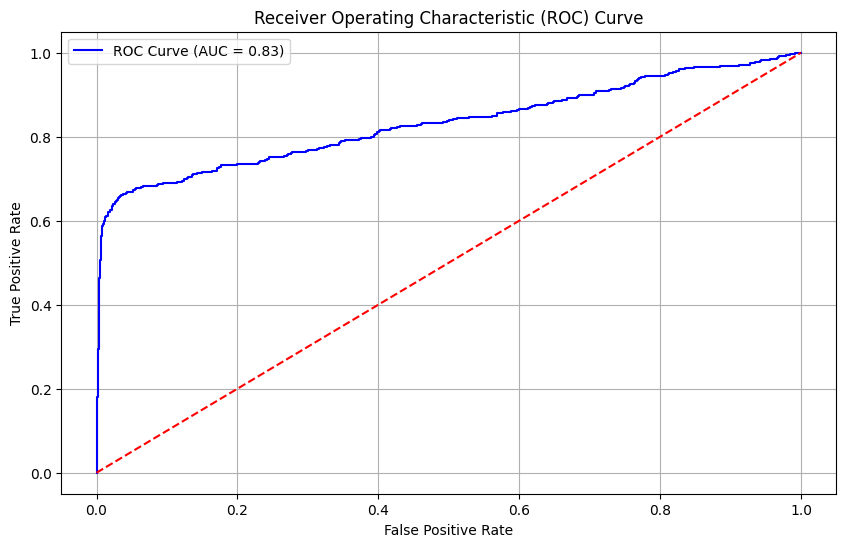

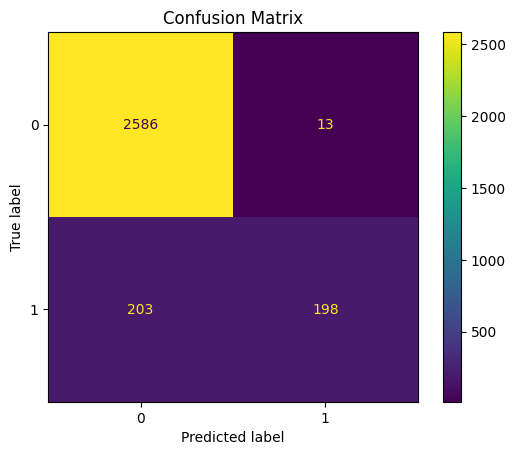

In [416]:
#Further Evalution of our final model

# Calculate ROC curve and AUC score 
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()